In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_excel(r"C:\Users\Rohit\Desktop\Machine Learning\SkinSegmentation.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B              245057 non-null int64
G              245057 non-null int64
R              245057 non-null int64
SKINNONSKIN    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [3]:
dataset.head()

,B,G,R,SKINNONSKIN
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


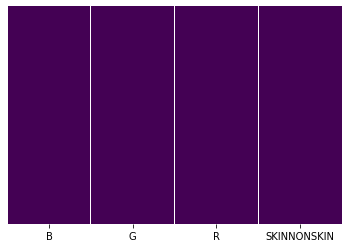

In [4]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="viridis")

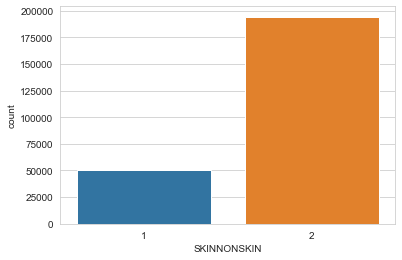

In [5]:
sns.set_style("whitegrid")
sns.countplot(x='SKINNONSKIN', data=dataset)

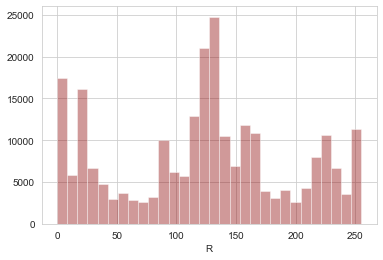

In [6]:
sns.distplot(dataset['R'].dropna(),kde=False,color='darkred',bins=30)

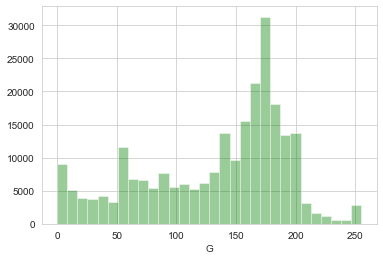

In [7]:
sns.distplot(dataset['G'].dropna(),kde=False,color='green',bins=30)

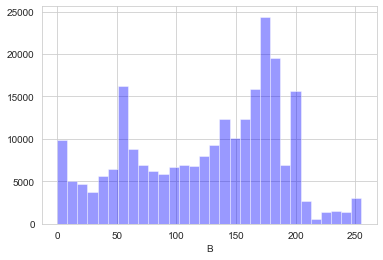

In [8]:
sns.distplot(dataset['B'].dropna(),kde=False,color='blue',bins=30)

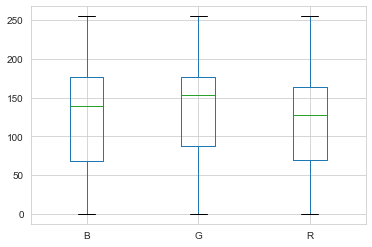

In [9]:
dataset.boxplot(column=['B','G','R'])

In [10]:
Quartile1 = dataset.B.quantile([0.25,0.5,0.75])
print(Quartile1)
LowerBound1 = Quartile1[0.25]-1.5*Quartile1[0.75]
print("LowerBound:\n",LowerBound1)
UpperBound1 = Quartile1[0.75]+1.5*Quartile1[0.25]
print("UpperBound:\n",UpperBound1)

0.25     68.0
0.50    139.0
0.75    176.0
Name: B, dtype: float64
LowerBound:
 -196.0
UpperBound:
 278.0


In [11]:
Quartile2 = dataset.G.quantile([0.25,0.5,0.75])
print(Quartile2)
LowerBound2 = Quartile2[0.25]-1.5*Quartile2[0.75]
print("LowerBound:\n",LowerBound2)
UpperBound2 = Quartile2[0.75]+1.5*Quartile2[0.25]
print("UpperBound:\n",UpperBound2)

0.25     87.0
0.50    153.0
0.75    177.0
Name: G, dtype: float64
LowerBound:
 -178.5
UpperBound:
 307.5


In [12]:
Quartile3 = dataset.R.quantile([0.25,0.5,0.75])
print(Quartile3)
LowerBound3 = Quartile3[0.25]-1.5*Quartile3[0.75]
print("LowerBound:\n",LowerBound3)
UpperBound3 = Quartile3[0.75]+1.5*Quartile3[0.25]
print("UpperBound:\n",UpperBound3)

0.25     70.0
0.50    128.0
0.75    164.0
Name: R, dtype: float64
LowerBound:
 -176.0
UpperBound:
 269.0


In [13]:
feature_coloumn= ["B","G","R"]
X = dataset[feature_coloumn]
y = dataset.SKINNONSKIN

In [14]:
print(X)

          B    G    R
0        74   85  123
1        73   84  122
2        72   83  121
3        70   81  119
4        70   81  119
...     ...  ...  ...
245052  163  162  112
245053  163  162  112
245054  163  162  112
245055  163  162  112
245056  255  255  255

[245057 rows x 3 columns]


In [15]:
print(y)

0         1
1         1
2         1
3         1
4         1
         ..
245052    2
245053    2
245054    2
245055    2
245056    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [16]:
import numpy as np
X,y = X[:245057],y[:245057]
shuffle_index = np.random.permutation(245057)
X,y = X.iloc[shuffle_index],y.iloc[shuffle_index]

In [17]:
print(X)

          B    G    R
100841   37   40    8
45991   138  161  229
228467  114  217  212
96630   172  171  121
29650   144  181  237
...     ...  ...  ...
186598  179  177  129
154259  155  149  112
19009    42   90  148
155542  136  139   90
123354   94   10    0

[245057 rows x 3 columns]


In [18]:
print(y)

100841    2
45991     1
228467    2
96630     2
29650     1
         ..
186598    2
154259    2
19009     1
155542    2
123354    2
Name: SKINNONSKIN, Length: 245057, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 0)

In [20]:
print("X_train Values:")
print(X_train)
print(X_train.shape)
print("---------------------")
print("y_train Values:")
print(y_train)
print(y_train.shape)

X_train Values:
          B    G    R
35469    89  133  216
213394  178  175  131
55731   182  179  135
169585  232  193   85
1538    205  213  253
...     ...  ...  ...
68619    47   13  227
108607    2    0    0
155655  130  133   94
175687  138  139   89
208049  159  162  123

[171539 rows x 3 columns]
(171539, 3)
---------------------
y_train Values:
35469     1
213394    2
55731     2
169585    2
1538      1
         ..
68619     2
108607    2
155655    2
175687    2
208049    2
Name: SKINNONSKIN, Length: 171539, dtype: int64
(171539,)


In [21]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
X_train = sca.fit_transform(X_train)
X_test = sca.transform(X_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(X_train,y_train)

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred1 = classifier1.predict(X_train)

In [24]:
from sklearn import metrics
Accuracy1 = metrics.accuracy_score(y_train, y_pred1)*100
print("Accuracy of training:", Accuracy1)

Accuracy of training: 91.90271600044305


In [25]:
y_pred2 = classifier1.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred2))
print("Classification report:\n",classification_report(y_test, y_pred2))

Confusion Matrix:
 [[12624  2674]
 [ 3335 54885]]
Classification report:
               precision    recall  f1-score   support

           1       0.79      0.83      0.81     15298
           2       0.95      0.94      0.95     58220

    accuracy                           0.92     73518
   macro avg       0.87      0.88      0.88     73518
weighted avg       0.92      0.92      0.92     73518



In [27]:
from sklearn import metrics
Accuracy2 = metrics.accuracy_score(y_test, y_pred2)*100
print("Accuracy:", Accuracy2)
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred2))

Accuracy: 91.82649147147637

MSE: 0.08173508528523626


In [28]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 91.90 %
Standard Deviation: 0.26 %


In [29]:
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier1, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy: 91.83 %
Standard Deviation: 0.34 %


# K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =1 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [31]:
y_pred3 = classifier2.predict(X_train)

In [32]:
from sklearn import metrics
Accuracy3 = metrics.accuracy_score(y_train, y_pred3)*100
print("Accuracy of training:", Accuracy3)

Accuracy of training: 99.99533633750926


In [33]:
y_pred4 = classifier2.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred4))
print("Classification report:\n",classification_report(y_test, y_pred4))
print("Accuracy of testing:",metrics.accuracy_score(y_test, y_pred4)*100)

Confusion Matrix:
 [[15289     9]
 [   26 58194]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15298
           2       1.00      1.00      1.00     58220

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

Accuracy of testing: 99.95239261133328


In [35]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

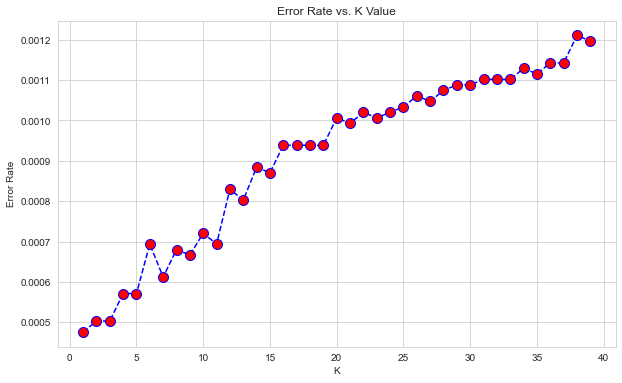

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors =3 , metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
y_pred5 = classifier2.predict(X_train)

In [39]:
from sklearn import metrics
Accuracy4 = metrics.accuracy_score(y_train, y_pred5)*100
print("Accuracy of training:", Accuracy4)

Accuracy of training: 99.97085210943284


In [40]:
y_pred6 = classifier2.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred6))
print("Classification report:\n",classification_report(y_test, y_pred6))
print("Accuracy of testing:",metrics.accuracy_score(y_test, y_pred6)*100)

Confusion Matrix:
 [[15293     5]
 [   32 58188]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15298
           2       1.00      1.00      1.00     58220

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

Accuracy of testing: 99.94967218912375


In [42]:
from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.02 %


In [43]:
from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier2, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

Accuracy: 99.93 %
Standard Deviation: 0.03 %


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
y_pred7 = classifier3.predict(X_train)

In [46]:
from sklearn import metrics
Accuracy5 = metrics.accuracy_score(y_train, y_pred7)*100
print("Accuracy of training:", Accuracy5)

Accuracy of training: 99.99358746407523


In [47]:
y_pred8 = classifier3.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred8))
print("Classification report:\n",classification_report(y_test, y_pred8))

Confusion Matrix:
 [[15294     4]
 [   42 58178]]
Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     15298
           2       1.00      1.00      1.00     58220

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518



In [49]:
from sklearn import metrics
Accuracy6 = metrics.accuracy_score(y_test, y_pred8)*100
print("Accuracy of testing:", Accuracy6)
print("\nMSE:",metrics.mean_squared_error(y_test,y_pred8))

Accuracy of testing: 99.93743028918088

MSE: 0.0006256971081911913


In [50]:
from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier3, X=X, y=y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))

Accuracy: 99.95 %
Standard Deviation: 0.01 %


# Support Vector Machine

In [51]:
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 0)
classifier4.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
y_pred9 = classifier4.predict(X_train)

In [53]:
from sklearn import metrics
Accuracy7 = metrics.accuracy_score(y_train, y_pred9)*100
print("Accuracy of training:", Accuracy7)

Accuracy of training: 99.83094223471048


In [54]:
y_pred10 = classifier4.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred10)
print(cm)

[[15297     1]
 [  130 58090]]


In [56]:
from sklearn import metrics
Accuracy8 = metrics.accuracy_score(y_test, y_pred10)*100
print("Accuracy of testing:", Accuracy8)

Accuracy of testing: 99.82181234527599


In [57]:
from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy: 99.83 %
Standard Deviation: 0.02 %


In [58]:
from sklearn.model_selection import cross_val_score
accuracies7 = cross_val_score(estimator = classifier4, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies7.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies7.std()*100))

C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy: 99.54 %
Standard Deviation: 0.07 %


# XGBoost

In [59]:
from xgboost import XGBClassifier
classifier5 = XGBClassifier()
classifier5.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [62]:
y_pred11 = classifier5.predict(X_train)

In [63]:
from sklearn import metrics
Accuracy9 = metrics.accuracy_score(y_train, y_pred11)*100
print("Accuracy of training:", Accuracy9)

Accuracy of training: 99.98892380158449


In [64]:
y_pred12 = classifier5.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred12)
print(cm)

[[15290     8]
 [   32 58188]]


In [67]:
from sklearn import metrics
Accuracy10 = metrics.accuracy_score(y_test, y_pred12)*100
print("Accuracy:", Accuracy10)

Accuracy: 99.94559155580947


In [68]:
from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))

Accuracy: 99.96 %
Standard Deviation: 0.02 %


In [69]:
from sklearn.model_selection import cross_val_score
accuracies9 = cross_val_score(estimator = classifier5, X = X_test, y = y_test, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies9.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies9.std()*100))

Accuracy: 99.92 %
Standard Deviation: 0.02 %
